In [111]:
from mss import mss
import random
import pydirectinput
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
import time
from gym import Env
from gym.spaces import Box, Discrete
import os

In [113]:
class WebGame(Env):
    def __init__(self):
        super().__init__()
        # Setup spaces
        self.observation_space = Box(low=0, high=255, shape=(1,83,100), dtype=np.uint8)
        self.action_space = Discrete(2)
        # Capture game frames
        self.cap = mss()
        self.game_location = {'top': 250, 'left': 50, 'width': 350, 'height': 500}
        self.done_location = {'top': 150, 'left': 90, 'width': 500, 'height': 50}
        
        
    def step(self, action):
        action_map = {
            0:'space', 
            1: 'no_op',
        }
        if action !=1:
            pydirectinput.press(action_map[action])

        done, done_cap = self.get_done() 
        observation = self.get_observation()
        reward = 2 
        info = {}
        return observation, reward, done, info
        
    
    def reset(self):
        time.sleep(1)
        pydirectinput.click(x=150, y=150)
        pydirectinput.press('space')
        return self.get_observation()
        
    def render(self):
        cv2.imshow('Game', self.current_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            self.close()
         
    def close(self):
        cv2.destroyAllWindows()
    
    def get_observation(self):
        raw = np.array(self.cap.grab(self.game_location))[:,:,:3].astype(np.uint8)
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (100,83))
        channel = np.reshape(resized, (1,83,100))
        return channel
    
    def get_done(self):
        done_cap = np.array(self.cap.grab(self.done_location))
        done_strings = ['GAME']
        done=True
        res = pytesseract.image_to_string(done_cap)[:4]
        if res in done_strings:
            done = True
        return done, done_cap

In [114]:
env = WebGame()

In [115]:
obs = env.get_observation()

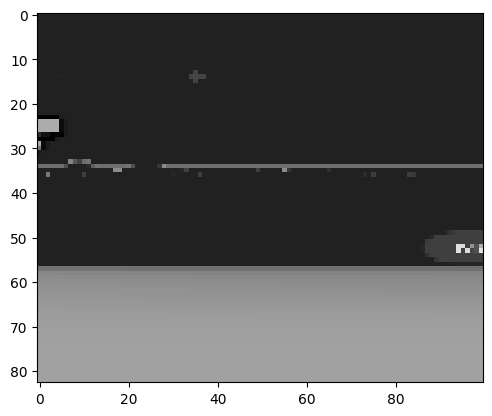

In [116]:
plt.imshow(cv2.cvtColor(obs[0], cv2.COLOR_GRAY2BGR))   

In [95]:
done, done_cap = env.get_done()

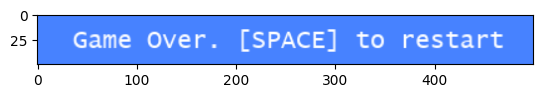

In [96]:
plt.imshow(done_cap)

In [97]:
pytesseract.image_to_string(done_cap)[:4]

'Game'

In [98]:
done

True

In [110]:
for episode in range(10): 
    obs = env.reset()
    done = False  
    total_reward   = 0
    while not done: 
        obs, reward,  done, info =  env.step(env.action_space.sample())
        total_reward  += reward
    print('Total Reward for episode {} is {}'.format(episode, total_reward)) 

Total Reward for episode 0 is 2
Total Reward for episode 1 is 2
Total Reward for episode 2 is 2
Total Reward for episode 3 is 2
Total Reward for episode 4 is 2
Total Reward for episode 5 is 2
Total Reward for episode 6 is 2
Total Reward for episode 7 is 2
Total Reward for episode 8 is 2
Total Reward for episode 9 is 2


In [100]:
for episode in range(10): 
    obs = env.reset()  
    done = False  
    total_reward   = 1
    while not done: 
        obs, reward,  done, info =  env.step(env.action_space.sample())
        total_reward += reward
    print('Total Reward for episode {} is {}, random action {}'.format(episode, total_reward, env.action_space.sample()))

Total Reward for episode 0 is 3, random action 1
Total Reward for episode 1 is 3, random action 0
Total Reward for episode 2 is 3, random action 1
Total Reward for episode 3 is 3, random action 0
Total Reward for episode 4 is 3, random action 0
Total Reward for episode 5 is 3, random action 1
Total Reward for episode 6 is 3, random action 1
Total Reward for episode 7 is 3, random action 0
Total Reward for episode 8 is 3, random action 0
Total Reward for episode 9 is 3, random action 1


In [106]:
env.action_space.sample()

1

In [20]:
env.observation_space

Box([[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]], [[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]], (1, 83, 100), uint8)

Total Reward for episode 0 is 2, random action 1
Total Reward for episode 1 is 2, random action 0
Total Reward for episode 2 is 2, random action 0
Total Reward for episode 3 is 2, random action 0
Total Reward for episode 4 is 2, random action 0


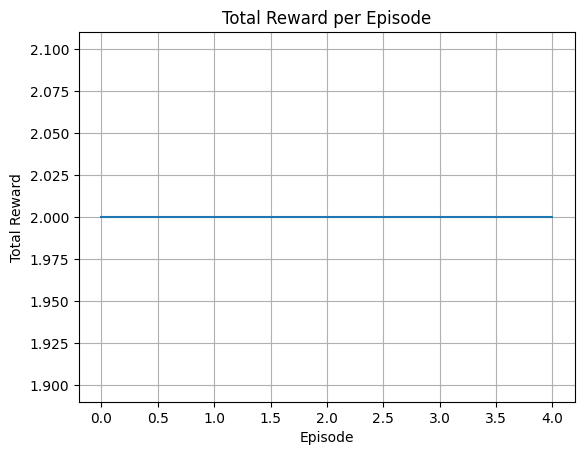

In [51]:
import matplotlib.pyplot as plt

# Inisialisasi variabel untuk menyimpan data total reward untuk setiap episode
episode_rewards = []

for episode in range(5):
    obs = env.reset()
    done = False
    total_reward = 1

    while not done:
        obs, reward, done, info = env.step(env.action_space.sample())
        total_reward += reward

    # Menambahkan total reward dari episode ini ke dalam list episode_rewards
    episode_rewards.append(total_reward)

    print('Total Reward for episode {} is {}, random action {}'.format(episode, total_reward, env.action_space.sample()))

# Membuat plot untuk menampilkan data total reward
plt.plot(range(5), episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.grid(True)
plt.show()

In [52]:
import matplotlib.pyplot as plt

# Inisialisasi variabel untuk menyimpan data total reward untuk setiap episode
episode_rewards = []

for episode in range(50):
    obs = env.reset()
    done = False
    total_reward = 1

    while not done:
        obs, reward, done, info = env.step(env.action_space.sample())
        total_reward += reward

    # Menambahkan total reward dari episode ini ke dalam list episode_rewards
    episode_rewards.append(total_reward)

    print('Total Reward for episode {} is {}, random action {}'.format(episode, total_reward, env.action_space.sample()))

# Membuat plot untuk menampilkan data total reward
x_data = range(50)  # Sumbo x dari 0 hingga 14 (15 elemen)
y_data = [env.action_space.sample() for _ in range(50)]  # Generate 15 random actions

# Create the plot
plt.plot(x_data, y_data)
plt.xlabel('Episode')
plt.ylabel('Random Action')
plt.title('Random Action per Episode')
plt.grid(True)
plt.show()

Total Reward for episode 0 is 2, random action 1
Total Reward for episode 1 is 2, random action 1
Total Reward for episode 2 is 2, random action 0
Total Reward for episode 3 is 2, random action 1
Total Reward for episode 4 is 2, random action 0
Total Reward for episode 5 is 2, random action 1
Total Reward for episode 6 is 2, random action 0
Total Reward for episode 7 is 2, random action 0
Total Reward for episode 8 is 2, random action 0
Total Reward for episode 9 is 2, random action 0
Total Reward for episode 10 is 2, random action 1
Total Reward for episode 11 is 2, random action 1
Total Reward for episode 12 is 2, random action 1
Total Reward for episode 13 is 2, random action 1
Total Reward for episode 14 is 2, random action 1
Total Reward for episode 15 is 2, random action 1
Total Reward for episode 16 is 2, random action 0
Total Reward for episode 17 is 2, random action 1
Total Reward for episode 18 is 2, random action 0


KeyboardInterrupt: 

Total Reward for episode 0 is 3, random action 1
Total Reward for episode 1 is 3, random action 0
Total Reward for episode 2 is 3, random action 1
Total Reward for episode 3 is 3, random action 0
Total Reward for episode 4 is 3, random action 0
Total Reward for episode 5 is 3, random action 0
Total Reward for episode 6 is 3, random action 1
Total Reward for episode 7 is 3, random action 1
Total Reward for episode 8 is 3, random action 1
Total Reward for episode 9 is 3, random action 0
Total Reward for episode 10 is 3, random action 1
Total Reward for episode 11 is 3, random action 0
Total Reward for episode 12 is 3, random action 1
Total Reward for episode 13 is 3, random action 0
Total Reward for episode 14 is 3, random action 0
Total Reward for episode 15 is 3, random action 1
Total Reward for episode 16 is 3, random action 1
Total Reward for episode 17 is 3, random action 0
Total Reward for episode 18 is 3, random action 1
Total Reward for episode 19 is 3, random action 0
Total Rewa

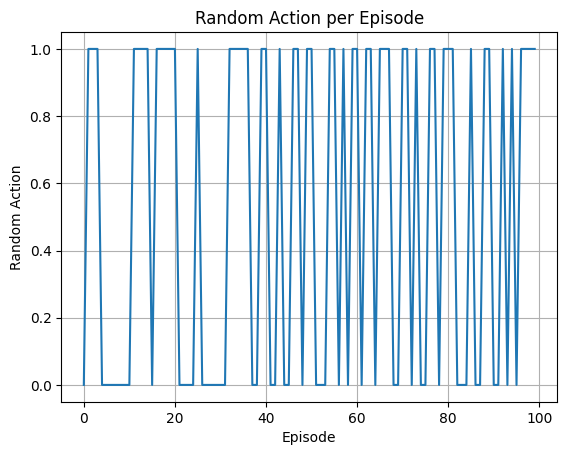

In [15]:
import matplotlib.pyplot as plt

# Inisialisasi variabel untuk menyimpan data total reward untuk setiap episode
episode_rewards = []

for episode in range(100):
    obs = env.reset()
    done = False
    total_reward = 1

    while not done:
        obs, reward, done, info = env.step(env.action_space.sample())
        total_reward += reward

    # Menambahkan total reward dari episode ini ke dalam list episode_rewards
    episode_rewards.append(total_reward)

    print('Total Reward for episode {} is {}, random action {}'.format(episode, total_reward, env.action_space.sample()))

# Membuat plot untuk menampilkan data total reward
x_data = range(100)  # Sumbo x dari 0 hingga 14 (15 elemen)
y_data = [env.action_space.sample() for _ in range(100)]  # Generate 15 random actions

# Create the plot
plt.plot(x_data, y_data)
plt.xlabel('Episode')
plt.ylabel('Random Action')
plt.title('Random Action per Episode')
plt.grid(True)
plt.show()

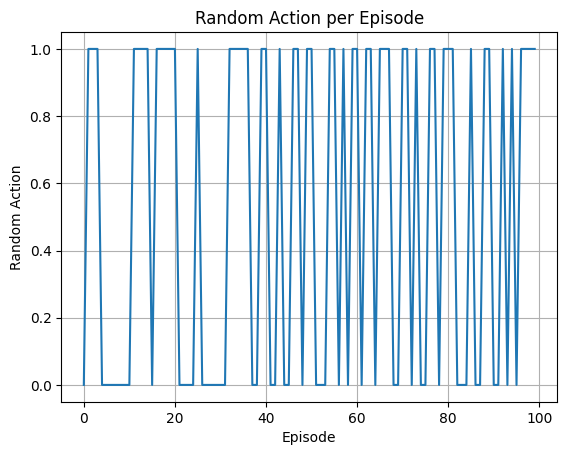

In [16]:
# Create the plot
plt.plot(x_data, y_data)
plt.xlabel('Episode')
plt.ylabel('Random Action')
plt.title('Random Action per Episode')
plt.grid(True)
plt.show()

In [146]:
import matplotlib.pyplot as plt

# Inisialisasi variabel untuk menyimpan data total reward untuk setiap episode
episode_rewards = []

for episode in range(200):
    obs = env.reset()
    done = False
    total_reward = 1

    while not done:
        obs, reward, done, info = env.step(env.action_space.sample())
        total_reward += reward

    # Menambahkan total reward dari episode ini ke dalam list episode_rewards
    episode_rewards.append(total_reward)

    print('Total Reward for episode {} is {}, random action {}'.format(episode, total_reward, env.action_space.sample()))

# Membuat plot untuk menampilkan data total reward
x_data = range(200)  # Sumbo x dari 0 hingga 14 (15 elemen)
y_data = [env.action_space.sample() for _ in range(200)]  # Generate 15 random actions

# Create the plot
plt.plot(x_data, y_data)
plt.xlabel('Episode')
plt.ylabel('Random Action')
plt.title('Random Action per Episode')
plt.grid(True)
plt.show()

In [147]:
import numpy as np

class QLearningAgent:
    def __init__(self, env, discount_factor=0.95, learning_rate=0.1, epsilon=0.1):
        self.env = env
        self.q_table = np.zeros((env.observation_space.shape[0], env.action_space.n))
        self.discount_factor = discount_factor
        self.learning_rate = learning_rate
        self.epsilon = epsilon

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return self.env.action_space.sample()  # Explore action space
        else:
            return np.argmax(self.q_table[state])  # Exploit learned values

    def learn(self, state, action, reward, next_state):
        old_value = self.q_table[state, action]
        next_max = np.max(self.q_table[next_state])

        new_value = (1 - self.learning_rate) * old_value + self.learning_rate * (reward + self.discount_factor * next_max)
        self.q_table[state, action] = new_value

# Inisialisasi variabel untuk menyimpan data total reward untuk setiap episode
episode_rewards = []

# Inisialisasi agent Q-Learning
agent = QLearningAgent(env)

for episode in range(5):
    obs = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = agent.choose_action(obs)
        next_obs, reward, done, info = env.step(action)
        agent.learn(obs, action, reward, next_obs)
        obs = next_obs
        total_reward += reward

    # Menambahkan total reward dari episode ini ke dalam list episode_rewards
    episode_rewards.append(total_reward)

    print('Total Reward for episode {} is {}, action {}'.format(episode, total_reward, action))

# Membuat plot untuk menampilkan data total reward
plt.plot(range(5), episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.grid(True)
plt.show()


IndexError: index 247 is out of bounds for axis 0 with size 1

In [149]:
env.observation_space.sample()

array([[[ 21, 175, 213, ...,   9,  37, 148],
        [237,  24,  53, ...,  80,  36, 245],
        [110,  76,  75, ..., 158, 157,  71],
        ...,
        [122, 167,  33, ..., 160,  22,   8],
        [182,  19, 217, ..., 151, 240, 207],
        [  7,  11, 233, ..., 188, 201, 245]]], dtype=uint8)

In [150]:
action_space_size = env.action_space
state_space_size = env.observation_space                    

q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

TypeError: 'Box' object cannot be interpreted as an integer

In [64]:
num_episodes = 2000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.1
exploration_decay_rate = 0.001

In [151]:
rewards_all_episodes =[]

for episode in range(num_episodes):
    obs = env.reset()
    done = False
    total_rewards = 0
        
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
            
        obs, reward, done, info = env.step(env.action_space.sample())
        
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
        learning_rate * (reward + discount_rate * np.max(q_table[obs, :]))
        
        state = new_state
        rewards_current_episode += reward
        
        if done == True:
            break
            
    env.close()

IndentationError: unexpected indent (2057314894.py, line 8)

In [66]:
# Import os for file path management
import os 
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback
# Check Environment    
from stable_baselines3.common import env_checker

In [152]:
env_checker.check_env(env)

NameError: name 'env_checker' is not defined

In [153]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

NameError: name 'BaseCallback' is not defined

In [154]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [155]:
callback = TrainAndLoggingCallback(check_freq=1000, save_path=CHECKPOINT_DIR)

NameError: name 'TrainAndLoggingCallback' is not defined

In [156]:
from stable_baselines3 import DQN
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack

In [157]:
env = WebGame()

In [158]:
model = DQN('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, buffer_size=1200000, learning_starts=10)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


C:\Users\anjum\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
C:\Users\anjum\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\buffers.py:229: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 19.94GB > 5.99GB
  warnings.warn(


In [159]:
model.learn(total_timesteps=10, callback=callback)

NameError: name 'callback' is not defined

In [ ]:
model.load('best_model') 

In [ ]:
for episode in range(10): 
    obs = env.reset()
    done = False
    total_reward = 0
    while not done:   
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(int(action))
        time.sleep(0.01)
        total_reward += reward
    print('Total Reward for episode {} is {}'.format(episode, total_reward))

In [56]:
action_space.sample

NameError: name 'action_space' is not defined